Тестовий пакет – MIRFlickr-20k (https://press.liacs.nl/mirflickr/#sec_download)
Вибірка зображень – 250 зображень;
Формування вибірки зображень – псевдовипадкове, з використанням генератора Мерсена (стартове значення співпадає з номером студента в загальному списку групи) за модулем кількості зображень в тестовому пакеті.

Лабораторна робота №1
1.	Сформувати тестову вибірку зображень з вихідного пакета;
2.	Для кожного каналу кольору кожного зображення з тестового пакета обчислити наступні характеристики:
a.	Максимальна / мінімальне значення;
b.	 Математичне сподівання і дисперсію;
c.	 Медіану значень, інтерквартільний розмах;
d.	 Коефіцієнти асиметрії та ексцесу (нормалізований);
3.	Для кожного каналу кольору кожного зображення з тестового пакета побудувати гістограму значень яскравості пікселів;
4.	 Провести апроксимацію отриманих гістограм з використанням відомих імовірнісних розподілів, визначити найкращу апроксимацію;
5.	 Побудувати розподіл типів використаних імовірнісних розподілів для яких досягається мінімальне значення помилки апроксимації з п.4.


In [9]:
import os 
import time
import numpy  as np
from PIL import Image
import random 
from scipy.stats import iqr
from scipy.stats import skew,kurtosis
import seaborn as sns


In [10]:
test_index = random.sample(range(6,25001),250)
# Path to where my test images are stored
img_folder = os.path.join(os.getcwd(), 'mirflickr/')

# Collects all of the filenames for the images
# I want to process
test_images = []
for i in test_index:
    test_images.append('D:\\Учёба\\5курс\\Машинное обучение\\Labs\\Laba1\\images\\mirflickr/im'+ str(i) + '.jpg')

      
def convert(filename):  
    im = Image.open(filename)
    return np.array(im)
def img_list():
    t = time.time() 
    np_arrays = map(convert, test_images)
    arr_list = [i for i in np_arrays]
    return  arr_list


In [103]:
import matplotlib.pyplot as plt
import scipy
import pandas as pd


In [12]:
params = ['Image Number','Channel Number','Max','Min','ExpValue(UnifDist)','Variance','Median','Interquartile range','Skew',"Kurtosis",'Img']
def part1(img):
    param_list = []
    for i in range(len(img)):
        for Channel in range(3):
            img_ch = img[i][:,:,Channel]
            param_list.append(list((test_index[i],Channel,img_ch.max(),img_ch.min(),np.mean(img_ch),np.var(img_ch)
                                    ,np.median(img_ch),iqr(img_ch),skew(img_ch,None),kurtosis(img_ch,None),img_ch)))
    
    return pd.DataFrame(param_list,columns = params)

In [13]:
images = img_list()
Data = part1(images)
Data

,Image Number,Channel Number,Max,Min,ExpValue(UnifDist),Variance,Median,Interquartile range,Skew,Kurtosis,Img
0,3200,0,255,0,101.986482,4522.576963,86.0,126.0,0.381405,-1.251758,"[[36, 37, 35, 35, 31, 36, 33, 27, 26, 17, 34, ..."
1,3200,1,255,0,101.986482,4522.576963,86.0,126.0,0.381405,-1.251758,"[[36, 37, 35, 35, 31, 36, 33, 27, 26, 17, 34, ..."
2,3200,2,255,0,101.986482,4522.576963,86.0,126.0,0.381405,-1.251758,"[[36, 37, 35, 35, 31, 36, 33, 27, 26, 17, 34, ..."
3,14425,0,255,0,147.071904,5582.166126,148.0,118.0,-0.305514,-0.984685,"[[70, 64, 60, 60, 59, 70, 80, 71, 78, 80, 79, ..."
4,14425,1,255,0,117.938678,5336.893247,106.0,108.0,0.440208,-0.853749,"[[116, 117, 121, 126, 125, 132, 140, 131, 124,..."
...,...,...,...,...,...,...,...,...,...,...,...
745,6390,1,255,0,133.927532,9931.767565,88.0,206.0,0.132357,-1.746678,"[[234, 234, 234, 234, 234, 234, 234, 234, 235,..."
746,6390,2,255,0,130.607327,10142.463105,83.0,214.0,0.185277,-1.746932,"[[232, 232, 232, 232, 232, 232, 232, 232, 233,..."
747,11176,0,255,0,74.402972,7239.067438,31.0,145.0,0.818307,-0.842998,"[[5, 5, 6, 6, 4, 4, 6, 6, 4, 4, 3, 4, 6, 8, 7,..."
748,11176,1,255,0,92.546369,7911.629498,68.0,173.0,0.508336,-1.223211,"[[10, 10, 11, 11, 9, 9, 11, 11, 12, 12, 10, 11..."


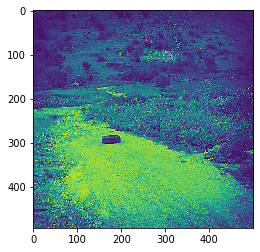

In [14]:
plt.imshow(Data.loc[Data['Channel Number'] == 0]['Img'][0])

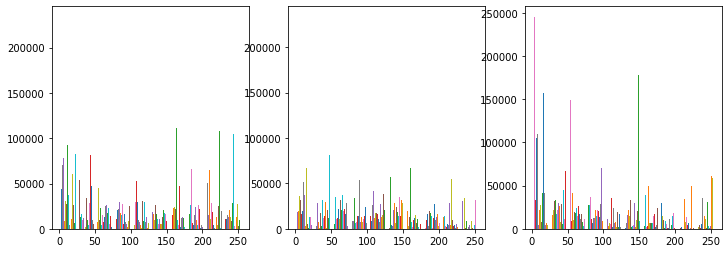

In [15]:
plt.figure(figsize=(12,9))
plt.subplot(231),plt.hist(Data.loc[Data['Channel Number'] == 0]['Img'])
plt.subplot(232),plt.hist(Data.loc[Data['Channel Number'] == 1]['Img'])
plt.subplot(233),plt.hist(Data.loc[Data['Channel Number'] == 2]['Img'])
plt.show()

In [17]:
hist_data = Data.loc[Data['Channel Number'] == 0]['Img']
test = hist_data[0]

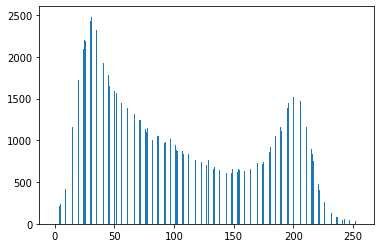

In [134]:
plt.hist(test,bins = 1000)
plt.show()

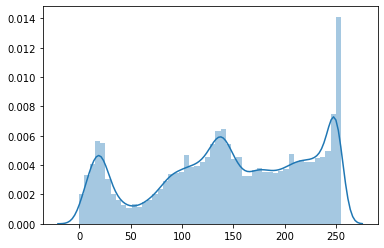

In [170]:
X,Y = sns.distplot(np.ravel(test)).get_lines()[0].get_data()


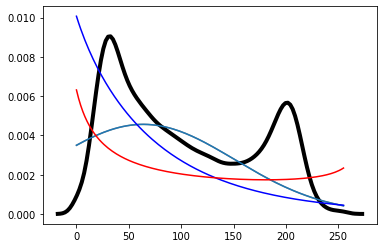

In [133]:
import matplotlib.pylab as plt
from scipy import stats
test = np.ravel(test)
xt = plt.xticks()[0]  
xmin, xmax = min(xt), max(xt)  
lnspc = np.linspace(0, 255, len(X))

m, s = stats.norm.fit((X,Y))# get mean and standard deviation  
pdf_g = stats.norm.pdf(lnspc, m, s) # now get theoretical values in our interval  
plt.plot(lnspc, pdf_g, label="Norm",color = 'grey') # plot it
plt.plot(X,Y,color = 'black',linewidth = 4)

plt.plot(lnspc, pdf_g, label="Norm") # plot it
ag,bg,cg = stats.gamma.fit((X,Y))  
pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)  
plt.plot(lnspc, pdf_gamma, label="Gamma",color = 'blue')


ab,bb,cb,db = stats.beta.fit((X,Y))
pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)  
plt.plot(lnspc, pdf_beta, label="Beta",color = 'red')

plt.show()

In [204]:
def fi(images):
    mse1 = []
    mse2 = []
    mse3 = []
    for i in images:
        X,Y = sns.distplot(np.ravel(i)).get_lines()[0].get_data()
        """
        for s in range(len(X)):
            if  0 <= X[s]   <=255:
                X[s] = X[s]
            else :
                X[s] = 0
        """
        lnspc = np.linspace(0, 255, len(X))
        m, s = stats.norm.fit((X,Y))  
        pdf_g = stats.norm.pdf(lnspc, m, s) 
        ag,bg,cg = stats.gamma.fit((X,Y))  
        pdf_gamma = stats.gamma.pdf(lnspc, ag, bg,cg)
        ab,bb,cb,db = stats.beta.fit((X,Y))
        pdf_beta = stats.beta.pdf(lnspc, ab, bb,cb, db)
        mse1.append(sum((Y - pdf_g)**2) )#+ sum((X -lnspc)**2))
        mse2.append(sum((Y - pdf_gamma)**2))#+ sum((X -lnspc)**2))
        mse3.append(sum((Y - pdf_beta)**2))#+ sum((X -lnspc)**2))
        
    MSE_norm = 1/250 * sum(mse1)
    MSE_gamma = 1/250 * sum(mse2)
    MSE_beta = 1/250 * sum(mse3)
    return MSE_norm,MSE_gamma,MSE_beta
        

(5.169251460471011e-05, 0.00012800707055030938, 0.0001045986399679315)

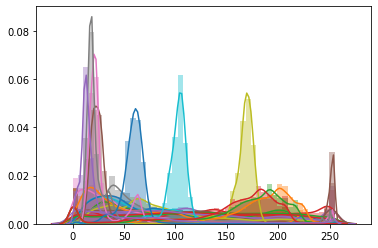

In [205]:
fi(Data['Img'][:25])